In [122]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
from importlib import reload
import trackpy as tp

from analysis_pipelines.peak_detection_stationary import peak_detection_stationary

In [123]:
filepath = 'C:\\Users\\alvelidjonatan\\Documents\\Data\\etMINFLUX-lab\\data-pex\\analysis_testing\\teststack-dt25s.tif'
imstack = tiff.imread(filepath)

In [180]:
import analysis_pipelines.peak_detection_stationary
reload(analysis_pipelines.peak_detection_stationary)
from analysis_pipelines.peak_detection_stationary import peak_detection_stationary

In [181]:
tracks = None
prev_events = None
for idx, frame in enumerate(imstack):
    coordinates, roi_sizes, img_ana, tracks = peak_detection_stationary(frame, None, None, tracks, None)

EVENT, frame 4
[array([188, 144])]

EVENT, frame 4
[array([188, 144]), array([ 69, 128])]

EVENT, frame 5
[array([121, 188])]

EVENT, frame 5
[array([121, 188]), array([ 69, 129])]

EVENT, frame 5
[array([121, 188]), array([ 69, 129]), array([188, 145])]

EVENT, frame 6
[array([120, 188])]

EVENT, frame 7
[array([165, 131])]

EVENT, frame 7
[array([165, 131]), array([152, 190])]

EVENT, frame 8
[array([203, 159])]

EVENT, frame 9
[array([155, 159])]

EVENT, frame 9
[array([155, 159]), array([203, 160])]

EVENT, frame 10
[array([155, 159])]

EVENT, frame 10
[array([155, 159]), array([203, 159])]

EVENT, frame 10
[array([155, 159]), array([203, 159]), array([ 99, 166])]



In [88]:
tracks

,particle,frame,x,y,intensity
0,0,0,20.0,183.0,5.164844
48,1,0,105.0,137.0,9.478805
47,2,0,105.0,180.0,8.516418
56,3,0,123.0,190.0,22.037436
1,4,0,20.0,199.0,9.610446
...,...,...,...,...,...
34,24,10,71.0,121.0,26.883679
33,362,10,70.0,161.0,8.328053
31,396,10,68.0,182.0,20.543428
62,398,10,114.0,82.0,59.687919


particle       3.000000
frame          0.000000
x            123.000000
y            190.000000
intensity     22.037436
Name: 56, dtype: float64
1.2862768025046083

particle      24.000000
frame          0.000000
x             71.000000
y            129.000000
intensity     11.820984
Name: 24, dtype: float64
1.9887108759000425

particle      29.000000
frame          0.000000
x             88.000000
y            202.000000
intensity     13.760076
Name: 37, dtype: float64
1.3667292310828634

particle      74.000000
frame          0.000000
x            165.000000
y            131.000000
intensity      7.499722
Name: 77, dtype: float64
1.6638707622455162

particle      80.000000
frame          0.000000
x            186.000000
y            146.000000
intensity     11.731844
Name: 86, dtype: float64
1.1571348402636774

particle      84.000000
frame          0.000000
x            153.000000
y            190.000000
intensity     11.031776
Name: 71, dtype: float64
1.2103246918880188

particle  

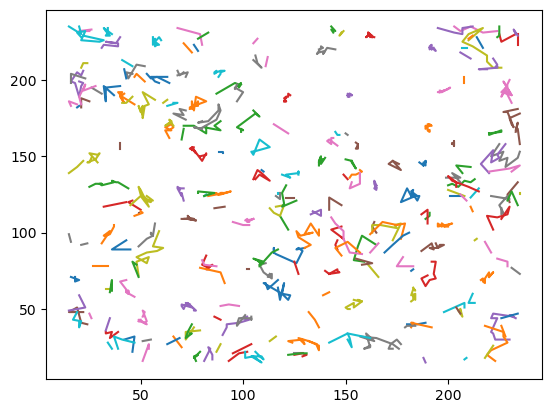

In [121]:
for particle in np.unique(tracks['particle']):
    particle_track = tracks[tracks['particle']==particle]
    plt.plot(particle_track['x'], particle_track['y'])
    #mov_std = np.std()
    if len(particle_track) > 4:
        movement = tp.motion.compute_drift(particle_track)
        msm = [np.sqrt((line1[1]['y']-line2[1]['y'])**2+(line1[1]['x']-line2[1]['x'])**2) for line1, line2 in zip(movement.iterrows(),movement.iloc[1:].iterrows())]
        if np.mean(msm) < 2:
            print(particle_track.iloc[0])
            print(np.mean(msm))
            print('')

In [116]:
test = [np.sqrt((line1[1]['y']-line2[1]['y'])**2+(line1[1]['x']-line2[1]['x'])**2) for line1, line2 in zip(movement.iterrows(),movement.iloc[1:].iterrows())]
print(test)
print(np.mean(test))

[3.605551275463989, 2.23606797749979, 4.47213595499958]
3.437918402654453


In [112]:
for line in movement.iterrows():
    print(line[1]['x'])

-3.0
0.0
-1.0
1.0
